<a href="https://colab.research.google.com/github/Divine193/access6.0projects/blob/master/WEEK3/week3sess5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# LOAD THE CLEANED DATASET
cleaned_data = pd.read_csv('/content/drive/MyDrive/Cleaned_Sales_Data.csv')

In [5]:
# PRINT OUT THE FIRST FIVE ROWS
cleaned_data.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,DATE,TOTAL SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.0,2.0,2020-01-01,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.0,4.0,2020-01-01,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.0,1.0,2020-01-01,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.0,1.0,2020-01-01,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.0,0.0,2020-01-01,0.82


In [6]:
# LAST FIVE ROWS
cleaned_data.tail()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES,DATE,TOTAL SALES
307640,2020,9,LEGENDS LTD,99753,DUTCHESS DE BOURGOGNE NR - 750ML,BEER,0.00,0.0,5.00,2020-09-01,5.00
307641,2020,9,ANHEUSER BUSCH INC,9997,HOEGAARDEN 4/6NR - 12OZ,BEER,66.12,37.0,240.75,2020-09-01,306.87
307642,2020,9,COASTAL BREWING COMPANY LLC,99970,DOMINION OAK BARREL STOUT 4/6 NR - 12OZ,BEER,2.25,0.0,0.00,2020-09-01,2.25
307643,2020,9,BOSTON BEER CORPORATION,99990,SAM ADAMS SUMMER VARIETY 12PK NR,BEER,20.50,0.0,0.00,2020-09-01,20.50
307644,2020,9,UNKNOWN,WC,WINE CREDIT,REF,0.00,0.0,-70.00,2020-09-01,-70.00


In [7]:
# PRINT OUT THE TOTAL ROWS AND COLUMNS OF THE DATASET
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307645 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307645 non-null  object 
 6   RETAIL SALES      307645 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
 9   DATE              307645 non-null  object 
 10  TOTAL SALES       307645 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 25.8+ MB


In [8]:
# print out the shape of dataset
cleaned_data.shape

(307645, 11)

In [9]:
cleaned_data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,307645.0,2018.438525,1.083061,2017.00,2017.0,2019.00,2019.00,2020.00
MONTH,307645.0,6.423862,3.461812,1.00,3.0,7.00,9.00,12.00
RETAIL SALES,307645.0,7.024003,30.986095,-6.49,0.0,0.32,3.26,2739.00
RETAIL TRANSFERS,307645.0,6.936465,30.237195,-38.49,0.0,0.00,3.00,1990.83
WAREHOUSE SALES,307645.0,25.294597,249.916798,-7800.00,0.0,1.00,5.00,18317.00
TOTAL SALES,307645.0,32.318600,266.486255,-7800.00,1.0,2.68,10.50,19491.00


In [10]:
# CHECK FOR ANY MISSING VALUES
cleaned_data.isna().sum()

,0
YEAR,0
MONTH,0
SUPPLIER,0
ITEM CODE,0
ITEM DESCRIPTION,0
ITEM TYPE,0
RETAIL SALES,0
RETAIL TRANSFERS,0
WAREHOUSE SALES,0
DATE,0


In [11]:
# CONVERT THE COLUMNS INTO A LIST
cleaned_data.columns.to_list()

['YEAR',
 'MONTH',
 'SUPPLIER',
 'ITEM CODE',
 'ITEM DESCRIPTION',
 'ITEM TYPE',
 'RETAIL SALES',
 'RETAIL TRANSFERS',
 'WAREHOUSE SALES',
 'DATE',
 'TOTAL SALES']

In [12]:
# Split the columns into categorical and numeric columns
numeric_col = cleaned_data.columns[cleaned_data.dtypes != 'object']
cat_col = cleaned_data.columns[cleaned_data.dtypes == 'object']

In [13]:
print(numeric_col)
print(cat_col)

Index(['YEAR', 'MONTH', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES',
       'TOTAL SALES'],
      dtype='object')
Index(['SUPPLIER', 'ITEM CODE', 'ITEM DESCRIPTION', 'ITEM TYPE', 'DATE'], dtype='object')


In [14]:
# No of unique items in each categorical column
for col in cat_col:
  print(col, ':', cleaned_data[col].nunique())

SUPPLIER : 397
ITEM CODE : 34056
ITEM DESCRIPTION : 34822
ITEM TYPE : 8
DATE : 24


##UNIVARIATE ANALYSIS

Text(0, 0.5, 'Frequency')

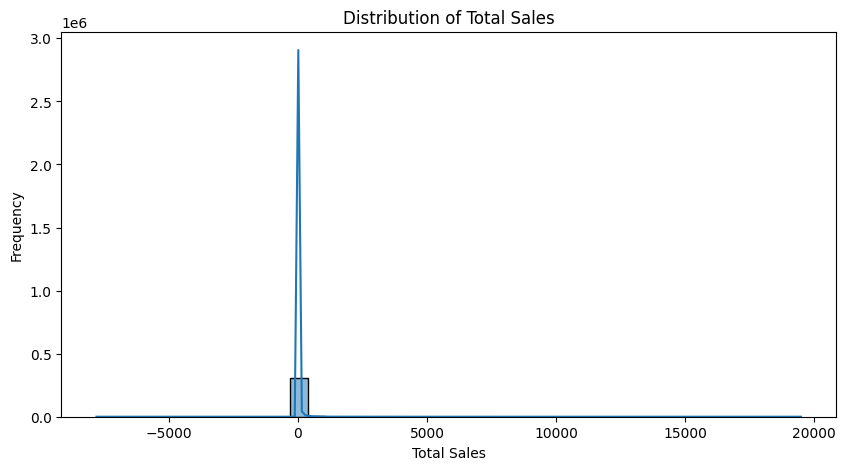

In [15]:
# Distribution of Total Sales
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data['TOTAL SALES'], bins=40, kde=True)
plt.title('Distribution of Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

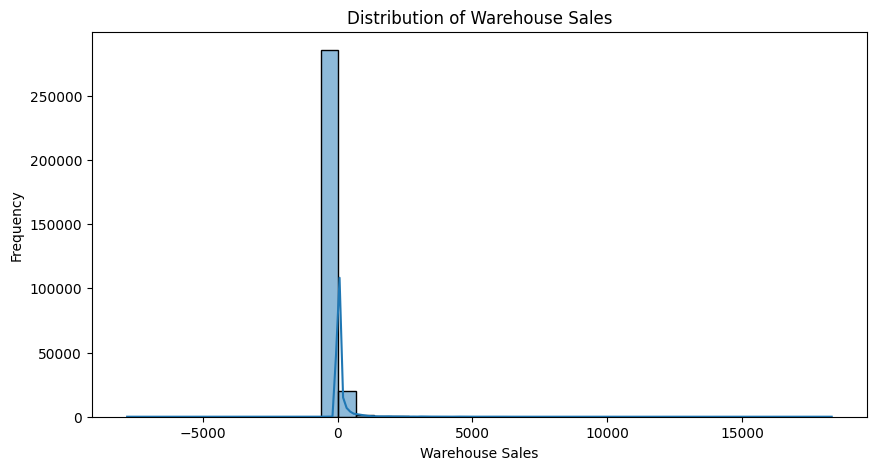

In [16]:
# Distribution of Warehouse Sales
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data['WAREHOUSE SALES'], bins=40, kde=True)
plt.title('Distribution of Warehouse Sales')
plt.xlabel('Warehouse Sales')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

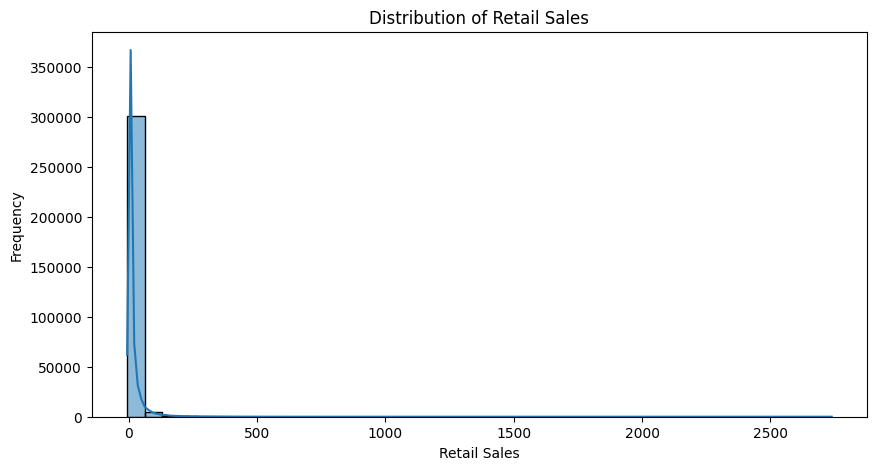

In [17]:
# Distribution of Retail Sales
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data['RETAIL SALES'], bins=40, kde=True)
plt.title('Distribution of Retail Sales')
plt.xlabel('Retail Sales')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

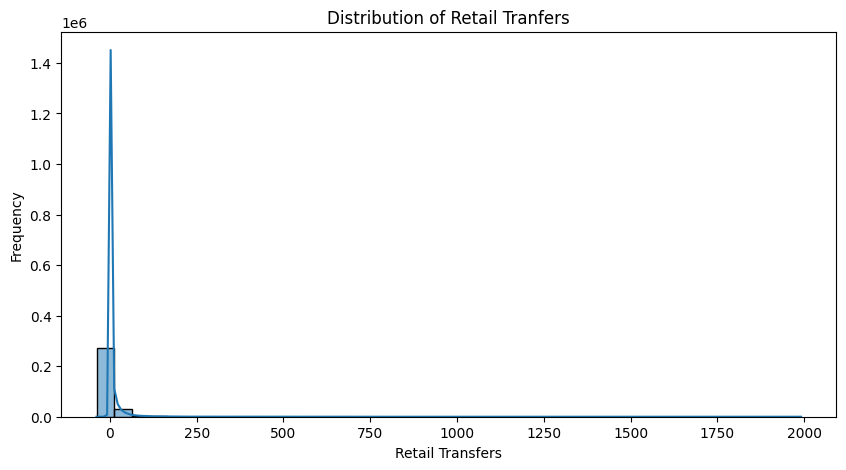

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_data['RETAIL TRANSFERS'], bins=40, kde=True)
plt.title('Distribution of Retail Tranfers')
plt.xlabel('Retail Transfers')
plt.ylabel('Frequency')

In [19]:
# Most Supplied item type
cleaned_data['ITEM TYPE'].value_counts()

,count
ITEM TYPE,
WINE,187641
LIQUOR,64910
BEER,42413
KEGS,10146
NON-ALCOHOL,1908
STR_SUPPLIES,405
REF,127
DUNNAGE,95


Text(0, 0.5, 'Item types')

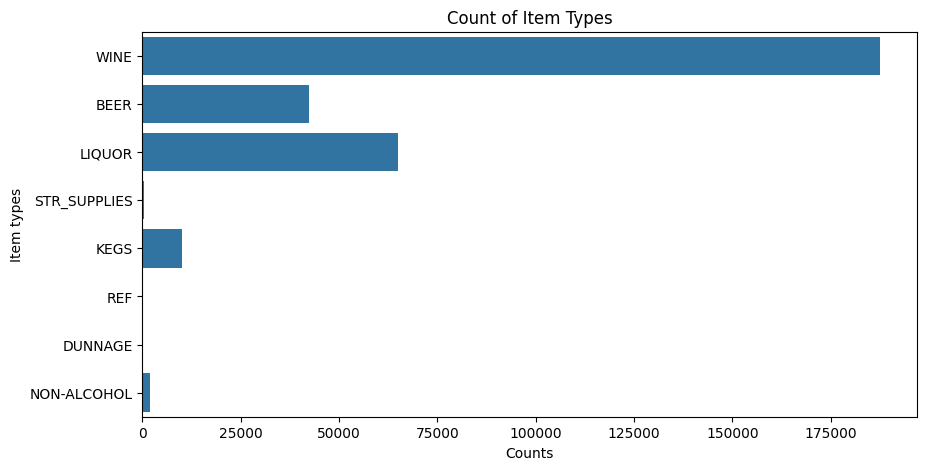

In [20]:
# Count of Item type
plt.figure(figsize=(10, 5))
sns.countplot(cleaned_data['ITEM TYPE'])
plt.title('Count of Item Types')
plt.xlabel('Counts')
plt.ylabel('Item types')

##BIVARIATE ANALYSIS

### Items with highest Total and average sales

In [21]:
# Overall Total Sales(Warehouse and Retail) and Average Total Sales by Item Type
cleaned_data.groupby('ITEM TYPE')['TOTAL SALES'].agg({'mean', 'sum'}).sort_values('sum', ascending=False).reset_index()

,ITEM TYPE,mean,sum
0,BEER,167.435858,7101457.04
1,WINE,10.144289,1903484.50
2,LIQUOR,13.828342,897597.70
3,KEGS,11.672679,118431.00
4,NON-ALCOHOL,31.569130,60233.90
5,STR_SUPPLIES,6.767605,2740.88
6,REF,-156.184016,-19835.37
7,DUNNAGE,-1278.463158,-121454.00


Text(0, 0.5, 'Total Sales')

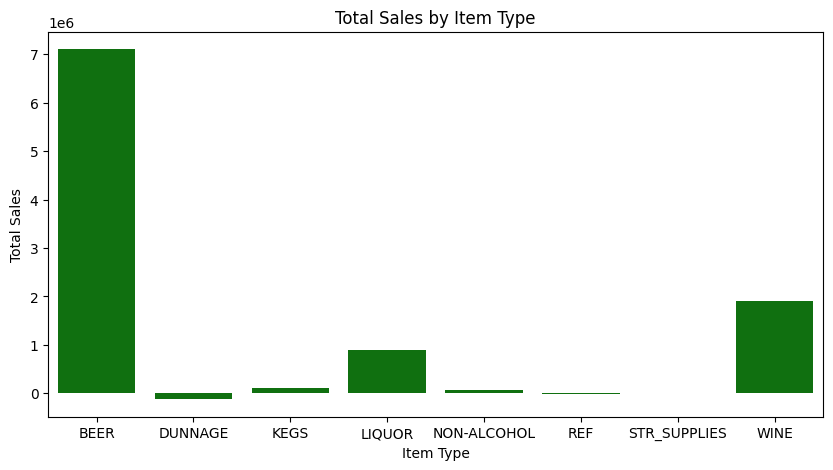

In [22]:
# Total Sales by Item Type
cat_total = cleaned_data.groupby('ITEM TYPE')['TOTAL SALES'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x = cat_total.index, y = cat_total.values, color='green')

plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')

In [23]:
# Total and Average Retail Sales by Item Type
cleaned_data.groupby('ITEM TYPE')['RETAIL SALES'].agg({'mean', 'sum'}).sort_values('sum', ascending=False).reset_index()

,ITEM TYPE,mean,sum
0,LIQUOR,12.366221,802691.43
1,WINE,3.978334,746498.59
2,BEER,13.538786,574220.53
3,NON-ALCOHOL,17.863894,34084.31
4,STR_SUPPLIES,6.767605,2740.88
5,REF,5.225433,663.63
6,KEGS,0.000000,0.00
7,DUNNAGE,0.000000,0.00


Text(0, 0.5, 'Average Retail Sales')

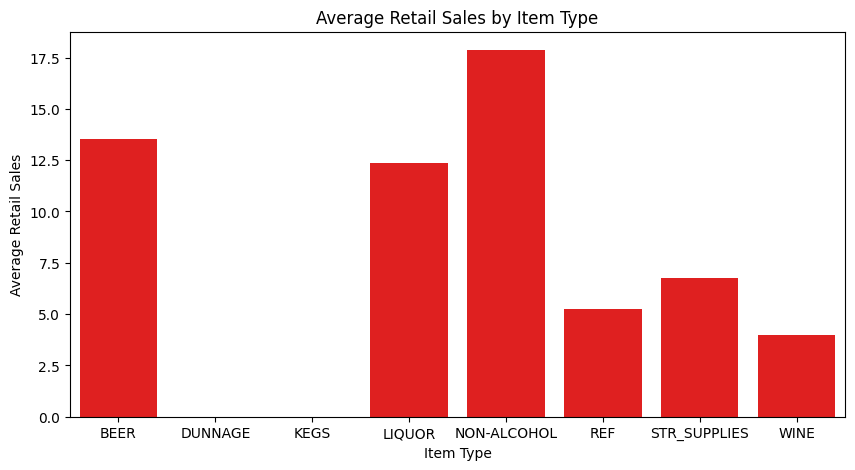

In [24]:
#Average Retail Sales by Item Type
cat_total = cleaned_data.groupby('ITEM TYPE')['RETAIL SALES'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x = cat_total.index, y = cat_total.values, color='red')

plt.title('Average Retail Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Retail Sales')

In [25]:
# Total and Average Warehouse Sales by Item Type
cleaned_data.groupby('ITEM TYPE')['WAREHOUSE SALES'].agg({'mean', 'sum'}).sort_values('sum', ascending=False).reset_index()

,ITEM TYPE,mean,sum
0,BEER,153.897072,6527236.51
1,WINE,6.165955,1156985.91
2,KEGS,11.672679,118431.00
3,LIQUOR,1.462121,94906.27
4,NON-ALCOHOL,13.705236,26149.59
5,STR_SUPPLIES,0.000000,0.00
6,REF,-161.409449,-20499.00
7,DUNNAGE,-1278.463158,-121454.00


Text(0, 0.5, 'Total Sales')

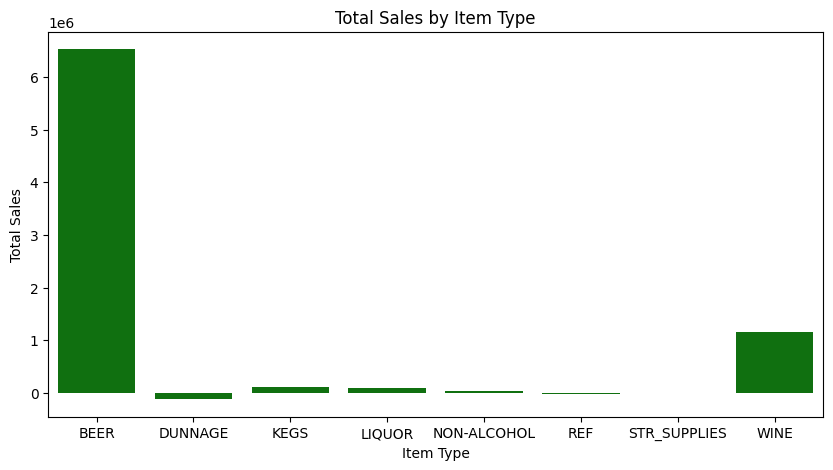

In [36]:
# Average Warehouse Sales by Item Type
cat_total = cleaned_data.groupby('ITEM TYPE')['WAREHOUSE SALES'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x = cat_total.index, y = cat_total.values, color='green')

plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')

##OUTLIER DETECTION

In [27]:
def find_iqr_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return series[(series < lower) | (series > upper)]

outliers_amount = find_iqr_outliers(cleaned_data['TOTAL SALES'].dropna())
print("IQR-based outliers in TOTAL SALES (count):", outliers_amount.shape[0])
display(outliers_amount.tail())

IQR-based outliers in TOTAL SALES (count): 45011


,TOTAL SALES
307636,323.00
307637,58.00
307639,114.00
307641,306.87
307644,-70.00


In [28]:
cleaned_data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,307645.0,2018.438525,1.083061,2017.00,2017.0,2019.00,2019.00,2020.00
MONTH,307645.0,6.423862,3.461812,1.00,3.0,7.00,9.00,12.00
RETAIL SALES,307645.0,7.024003,30.986095,-6.49,0.0,0.32,3.26,2739.00
RETAIL TRANSFERS,307645.0,6.936465,30.237195,-38.49,0.0,0.00,3.00,1990.83
WAREHOUSE SALES,307645.0,25.294597,249.916798,-7800.00,0.0,1.00,5.00,18317.00
TOTAL SALES,307645.0,32.318600,266.486255,-7800.00,1.0,2.68,10.50,19491.00


Text(0.5, 1.0, 'Distribution of Total Sales')

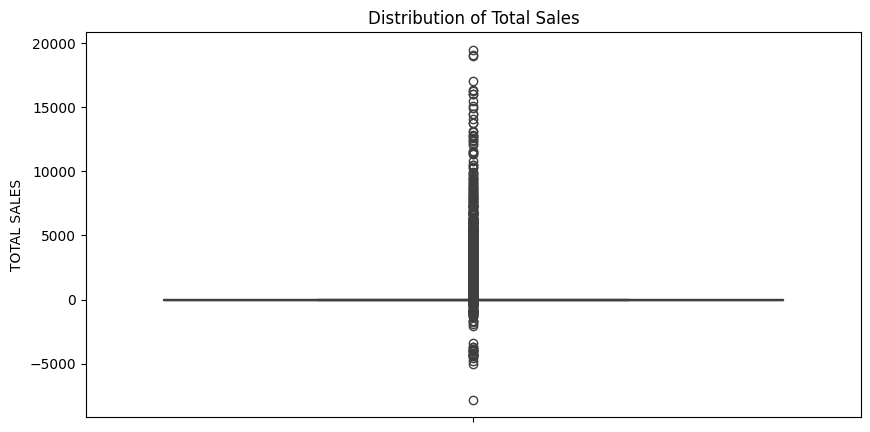

In [29]:
# Distribution of Total Sales with Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(cleaned_data['TOTAL SALES'])
plt.title('Distribution of Total Sales')
# plt.xlabel('Total Sales')
# plt.ylabel('Frequency')

In [30]:
# Group by ITEM TYPE and YEAR to get total sales for each item type per year
grouped_sales = cleaned_data.groupby(['ITEM TYPE', 'YEAR'])['TOTAL SALES'].sum().reset_index()
grouped_sales

,ITEM TYPE,YEAR,TOTAL SALES
0,BEER,2017,2146929.30
1,BEER,2018,460946.21
2,BEER,2019,3223566.39
3,BEER,2020,1270015.14
4,DUNNAGE,2017,-40771.00
5,DUNNAGE,2018,-10365.00
6,DUNNAGE,2019,-57465.00
7,DUNNAGE,2020,-12853.00
8,KEGS,2017,39001.00
9,KEGS,2018,9786.00


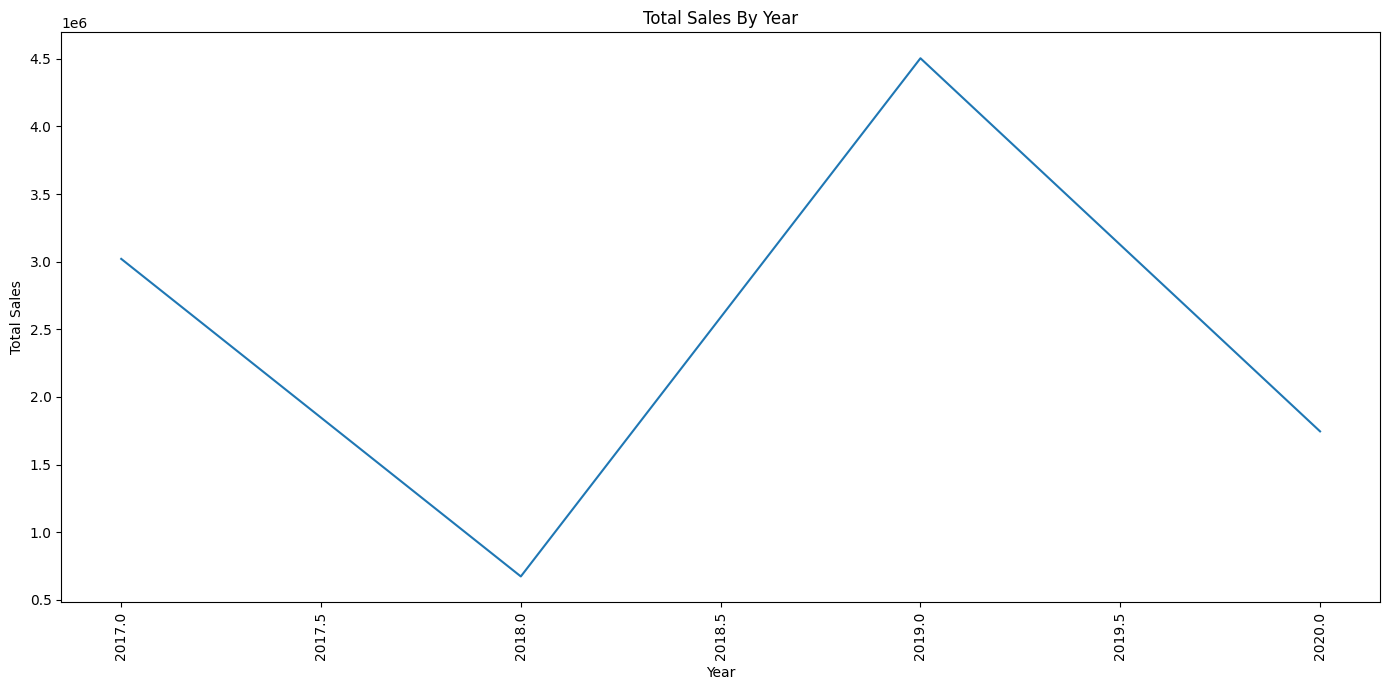

In [31]:
# Overall Total Sales by year
yearly_sales = cleaned_data.groupby('YEAR')['TOTAL SALES'].sum()
plt.figure(figsize=(14, 7))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Total Sales By Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation = 90)
plt.tight_layout()

Text(0.5, 1.0, 'Correlation Heatmap')

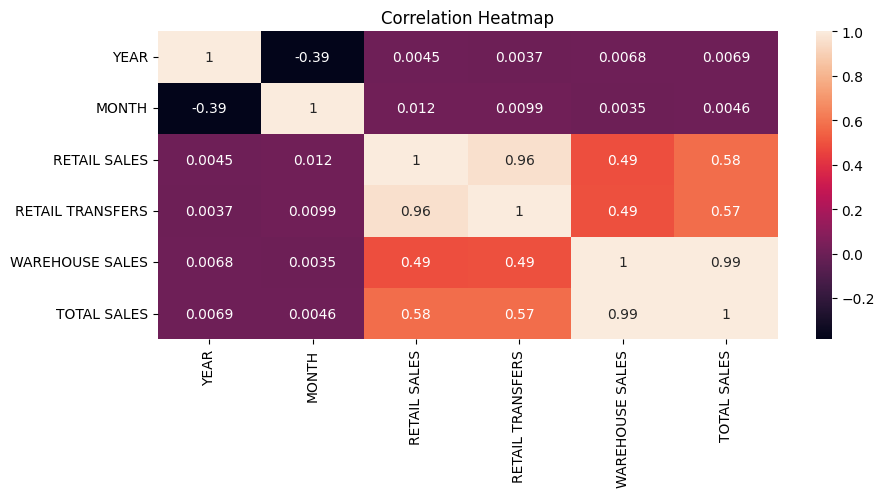

In [32]:

plt.figure(figsize = (10,4))
sns.heatmap(cleaned_data.corr(numeric_only = True), annot = True)
plt.title("Correlation Heatmap")

#Business Questions

###what is the item type with the largest total(warehouse and retail) sales?

Text(0, 0.5, 'Total Sales')

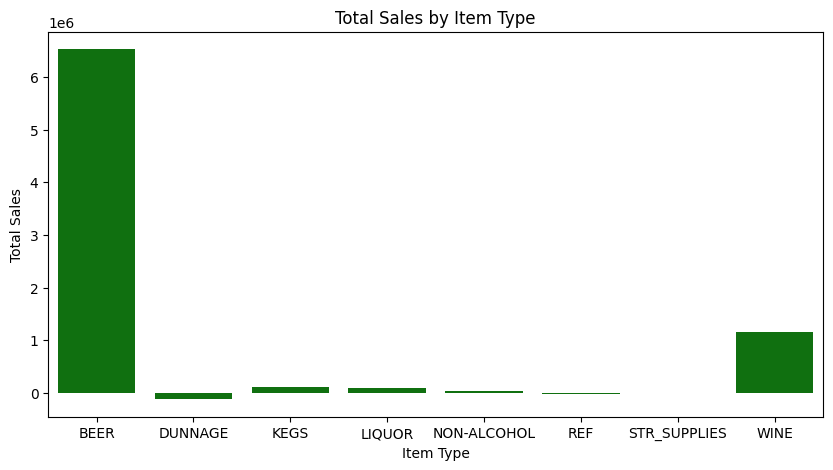

In [35]:
cat_total = cleaned_data.groupby('ITEM TYPE')['WAREHOUSE SALES'].sum()
plt.figure(figsize=(10, 5))
sns.barplot(x = cat_total.index, y = cat_total.values, color='green')

plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')

##

###what is the year with the biggest sales?

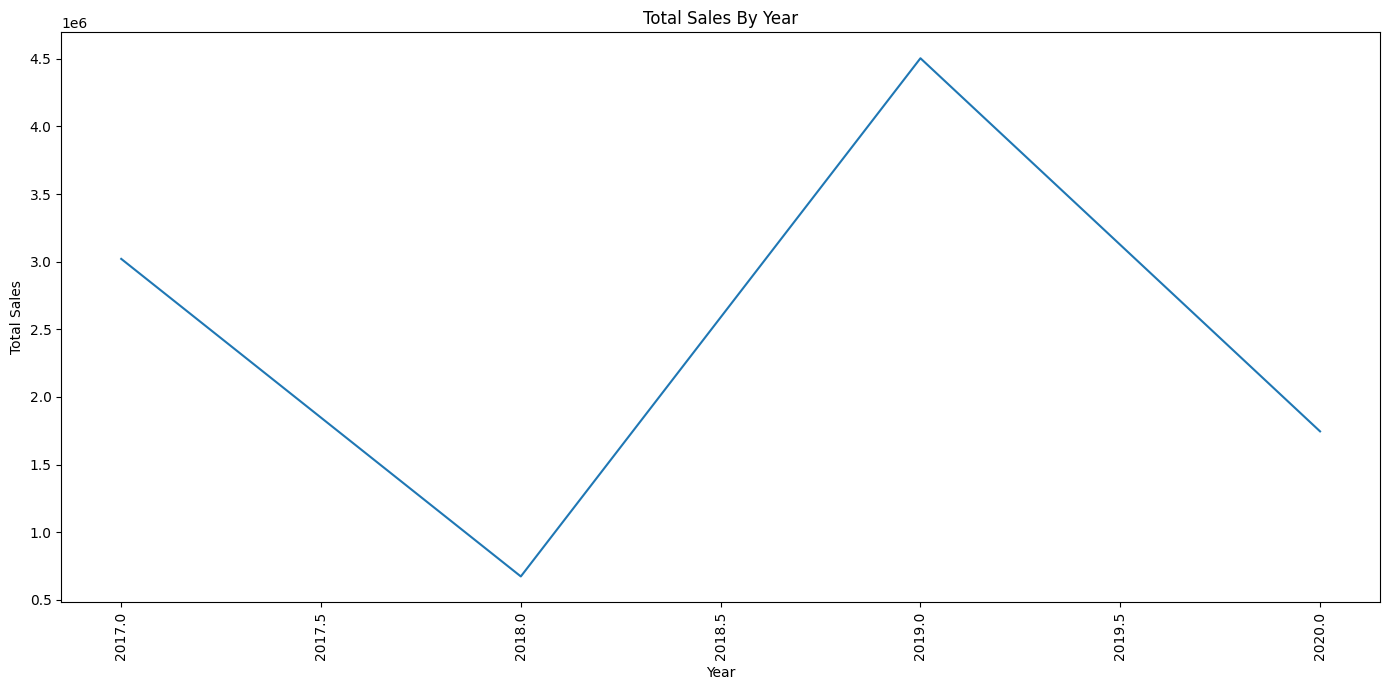

In [37]:
yearly_sales = cleaned_data.groupby('YEAR')['TOTAL SALES'].sum()
plt.figure(figsize=(14, 7))
sns.lineplot(x=yearly_sales.index, y=yearly_sales.values)
plt.title('Total Sales By Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.xticks(rotation = 90)
plt.tight_layout()

###what is the item type with the most unprofitable retail sales?


Text(0, 0.5, 'Average Retail Sales')

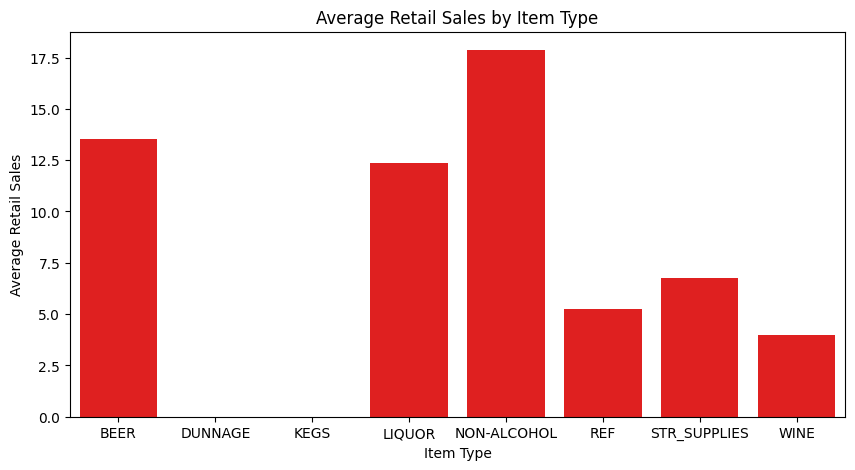

In [39]:
cat_total = cleaned_data.groupby('ITEM TYPE')['RETAIL SALES'].mean()
plt.figure(figsize=(10, 5))
sns.barplot(x = cat_total.index, y = cat_total.values, color='red')

plt.title('Average Retail Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Average Retail Sales')